# To Do

This notebook is used to generate a list of OSM features that have an unsatisfacotry level of detail. For example, this notebook helps to identify lots that do not have capacities set.

In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
from functools import reduce
from measurement.measures import Area
from decimal import Decimal
%matplotlib inline
ox.config(log_console=True, use_cache=False)
ox.__version__

'0.11'

In [2]:
place = "Downtown, Providence, RI, USA"

## Lot Stuff

In [3]:
footprint_type = "parking"
footprints = ox.footprints.footprints_from_place(place, footprint_type=footprint_type)
footprints = ox.project_gdf(footprints)

In [4]:
footprints['capacity'] = pd.to_numeric(footprints['capacity'])
required = ['capacity']
show = required + ['name', 'parking']

def checker(r):
    v = True
    for req in required:
        v &= r[req].notnull()
    return v

good = footprints[checker(footprints)]
bad = footprints[checker(footprints) == False]

In [5]:
bad[show]

,capacity,name,parking
369433008,NaN,Hilton Providence Parking,multi-storey
369433009,NaN,Regency Plaza Parking,multi-storey
760598460,NaN,Doorley Building Parking,multi-storey
760807698,NaN,Beneficent House Parking,multi-storey
761129126,NaN,2 Charles Street,multi-storey
764264707,NaN,Peerless Garage,underground
764664384,NaN,One Weybosset Hill Parking,multi-storey
765290066,NaN,Blue Cross Blue Sheild Parking Garage,underground


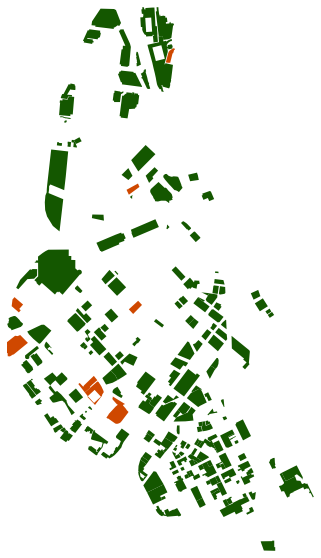

In [6]:
fig, ax = ox.plot_footprints(bad, color='#cf4800', show=False, figsize=(15, 10))
fig, ax = ox.plot_footprints(good, fig=fig, ax=ax, color='#145700')